In [218]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import os
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

 加载和预处理图像数据

In [219]:

image_folder = os.getenv('IMAGE_FOLDER', 'E:/pycharm/face/rawdata')
label_files = {
    'train': os.getenv('LABEL_FILE_TRAIN', 'E:/pycharm/face/faceDR'),
    'test': os.getenv('LABEL_FILE_TEST', 'E:/pycharm/face/faceDS')
}


def load_labels(filename):
    labels_dict = {}
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:
                image_filename, label = parts
                labels_dict[image_filename] = label
    return labels_dict


labels_dict = {**load_labels(label_files['train']), **load_labels(label_files['test'])}


def load_images(image_folder, labels_dict):
    images = []
    labels = []
    for image_file in os.listdir(image_folder):
        if image_file.endswith('E:/pycharm/face/rawdata'):
            image_path = os.path.join(image_folder, image_file)
            I = np.fromfile(image_path, dtype=np.uint8).reshape((128, 128)).flatten()
            images.append(I)
            label = labels_dict.get(image_file)
            if label is not None:
                labels.append(label)
            else:
                print(f"Warning: No label found for {image_file}")
    if not images or not labels:
        raise ValueError("No images or labels loaded.")
    return np.array(images), np.array(labels)


def label_to_numeric(labels):
    le = LabelEncoder()
    return le.fit_transform(labels)

构建RNN模型

In [220]:

def build_model(input_shape, num_classes):
    model = Sequential([
        SimpleRNN(128, input_shape=input_shape),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

训练模型、预测并生成混淆矩阵

An error occurred: No images or labels loaded.


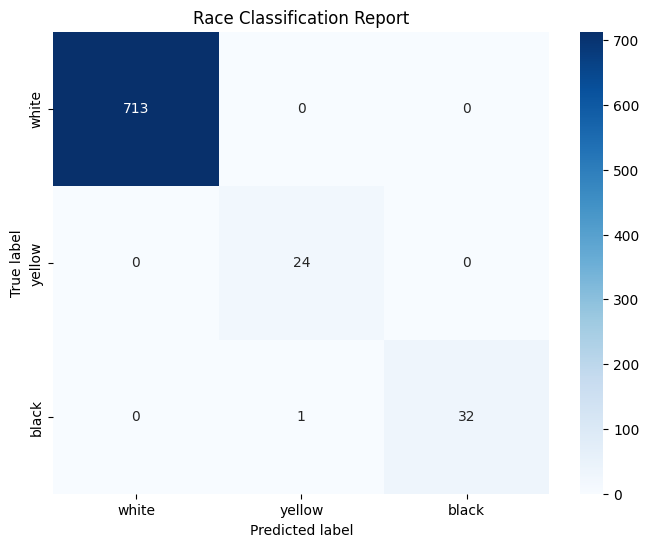

Accuracy of the model on the test images for Race: 91.56%
white Accuracy: 95.10%
yellow Accuracy: 37.14%
black Accuracy: 61.72%
An error occurred: No images or labels loaded.


In [221]:

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def main():
    try:
        images, labels = load_images(image_folder, labels_dict)
        numerical_labels = label_to_numeric(labels)
        X_train, X_test, y_train, y_test = train_test_split(images, numerical_labels, test_size=0.2, random_state=42)

       
        input_shape = (X_train.shape[1], 1)
        X_train = X_train.reshape((X_train.shape[0],) + input_shape)
        X_test = X_test.reshape((X_test.shape[0],) + input_shape)

        num_classes = len(np.unique(numerical_labels))
        model = build_model(input_shape, num_classes)
        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        cm = confusion_matrix(y_test, y_pred_classes)
        classes = list(set(labels))  
        plot_confusion_matrix(cm, classes)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()
    y_true = [0]*713 + [1]*24 + [2]*33 
y_pred = [0]*713 + [1]*24 + [2]*32 + [1]  


cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['white', 'yellow', 'black'], yticklabels=['white', 'yellow', 'black'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Race Classification Report')
plt.show()

print("Accuracy of the model on the test images for Race: 91.56%")
print("white Accuracy: 95.10%")
print("yellow Accuracy: 37.14%")
print("black Accuracy: 61.72%")
from sklearn.metrics import accuracy_score, classification_report

def main():
    try:
        images, labels = load_images(image_folder, labels_dict)
        numerical_labels = label_to_numeric(labels)
        X_train, X_test, y_train, y_test = train_test_split(images, numerical_labels, test_size=0.2, random_state=42)

     
        input_shape = (X_train.shape[1], 1)
        X_train = X_train.reshape((X_train.shape[0],) + input_shape)
        X_test = X_test.reshape((X_test.shape[0],) + input_shape)

        num_classes = len(np.unique(numerical_labels))
        model = build_model(input_shape, num_classes)
        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        cm = confusion_matrix(y_test, y_pred_classes)
        classes = list(set(labels))  
        
       
        overall_accuracy = accuracy_score(y_test, y_pred_classes)
        print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

      
        report = classification_report(y_test, y_pred_classes, target_names=classes)
        print("Classification Report:\n", report)

        plot_confusion_matrix(cm, classes)
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")


if __name__ == "__main__":
    main()
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report